# 결정 트리 모델의 시각화(Decision Tree Visualization)

**Graphviz를 이용하여 iris 데이터셋 결정 트리모델의 학습의 결과를 시각화한다.**

**또한, 결정트리 모델의 feature importance를 시각화 한다.**

## 1. 라이브러리 호출

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

## 2. 데이터 로드

In [ ]:
iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

## 3. 결정트리 분류모델 학습

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=1)

dt_model = DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## 4. Graphviz 시각화

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_model, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

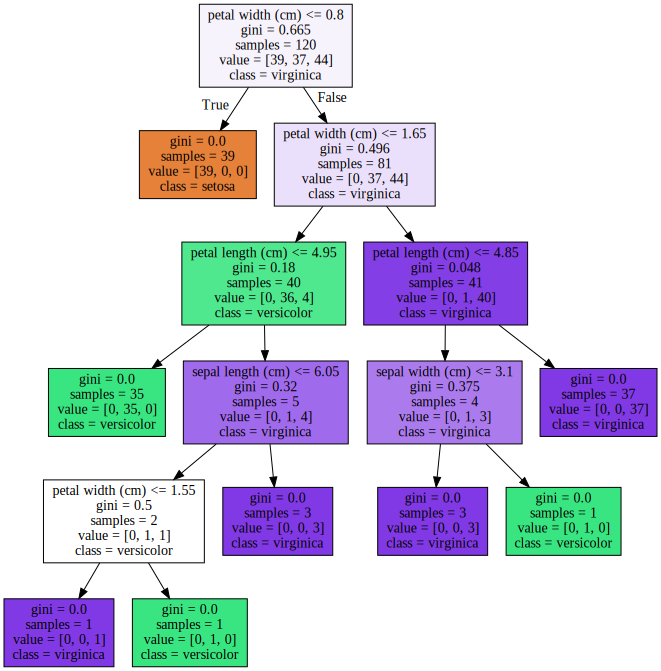

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 5. 수정

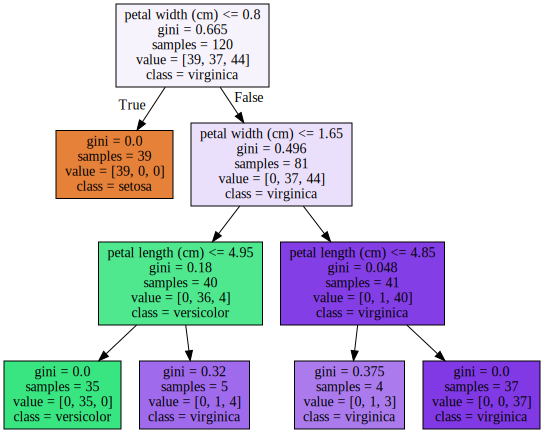

In [ ]:
dt_model2 = DecisionTreeClassifier(random_state = 1, max_depth = 3)
dt_model2.fit(X_train, y_train)

export_graphviz(dt_model2, out_file='tree2.dot', class_names=iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open('tree2.dot') as f:
    dot_graph2 = f.read()
graphviz.Source(dot_graph2)

## 6. Feature importance

Feature importances:
[0.008 0.019 0.076 0.898]
sepal length (cm) : 0.008
sepal width (cm) : 0.019
petal length (cm) : 0.076
petal width (cm) : 0.898


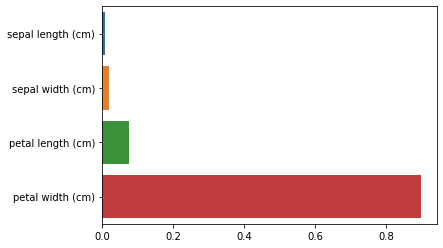

In [ ]:
print("Feature importances:\n{0}".format(np.round(dt_model.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names , dt_model.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_model.feature_importances_ , y=iris_data.feature_names)